# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [21]:
!ls /data/landmark_images/train/

00.Haleakala_National_Park	     25.Banff_National_Park
01.Mount_Rainier_National_Park	     26.Pont_du_Gard
02.Ljubljana_Castle		     27.Seattle_Japanese_Garden
03.Dead_Sea			     28.Sydney_Harbour_Bridge
04.Wroclaws_Dwarves		     29.Petronas_Towers
05.London_Olympic_Stadium	     30.Brooklyn_Bridge
06.Niagara_Falls		     31.Washington_Monument
07.Stonehenge			     32.Hanging_Temple
08.Grand_Canyon			     33.Sydney_Opera_House
09.Golden_Gate_Bridge		     34.Great_Barrier_Reef
10.Edinburgh_Castle		     35.Monumento_a_la_Revolucion
11.Mount_Rushmore_National_Memorial  36.Badlands_National_Park
12.Kantanagar_Temple		     37.Atomium
13.Yellowstone_National_Park	     38.Forth_Bridge
14.Terminal_Tower		     39.Gateway_of_India
15.Central_Park			     40.Stockholm_City_Hall
16.Eiffel_Tower			     41.Machu_Picchu
17.Changdeokgung		     42.Death_Valley_National_Park
18.Delicate_Arch		     43.Gullfoss_Falls
19.Vienna_City_Hall		     44.Trevi_Fountain
20.Matterhorn			     45.Temple_of_Heaven
21.Taj_

In [22]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torchvision, torch, numpy
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets
traintransform = torchvision.transforms.Compose([torchvision.transforms.Resize((224,224)),
                                                torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                                 torchvision.transforms.RandomRotation(degrees=(15, -15)),
                                                torchvision.transforms.ToTensor()])
datatransform = torchvision.transforms.Compose([torchvision.transforms.Resize((224,224)),
                                                torchvision.transforms.ToTensor()])
                                
batch_size = 64
num_workers = 0
valid_size = 0.2

datasetrain = torchvision.datasets.ImageFolder("/data/landmark_images/train")
datasetest = torchvision.datasets.ImageFolder("/data/landmark_images/train")

num_train = len(datasetrain)
indices = list(range(num_train))
numpy.random.shuffle(indices)
splitted = int(numpy.around((valid_size * num_train), 0))
train_idx, valid_idx = indices[splitted:], indices[:splitted]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

trainloader = torch.utils.data.DataLoader(datasetrain, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
validloader = torch.utils.data.DataLoader(datasetrain, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(datasetest, batch_size=batch_size, num_workers=num_workers)

loaders_scratch = {'train': trainloader, 
                   'valid': validloader, 
                   'test': testloader}

trainloader.dataset.transform=traintransform
validloader.dataset.transform=datatransform
testloader.dataset.transform=datatransform

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 
the network resizes the images the images by making them 224 x 224, I think this is better than cropping as the image does not lose any information, this size is good as it is not massive and not small enough that data is lost
augmentations that I used are only flips and rotations, but this is not enough  

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

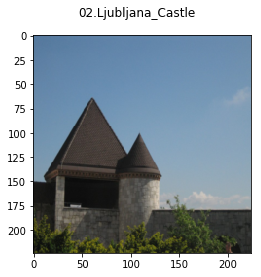

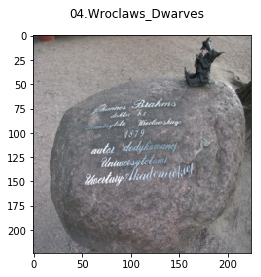

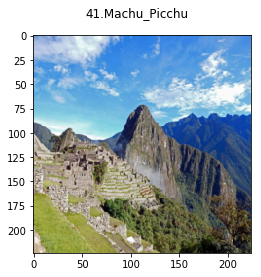

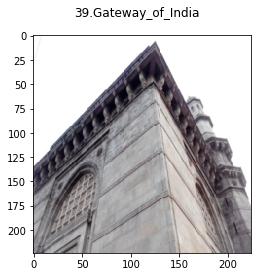

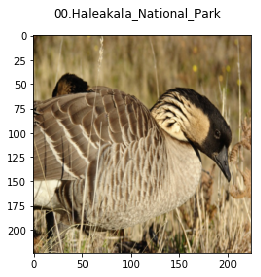

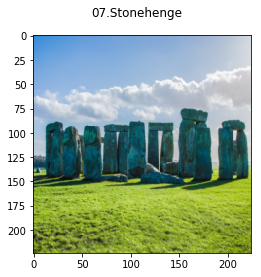

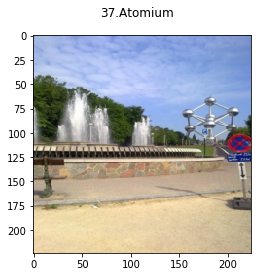

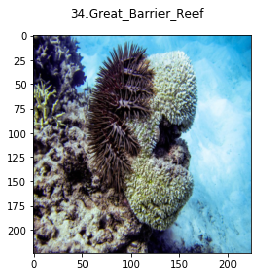

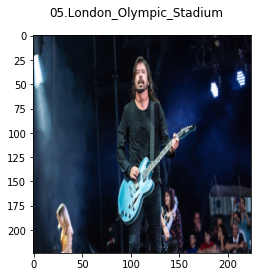

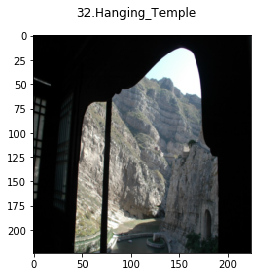

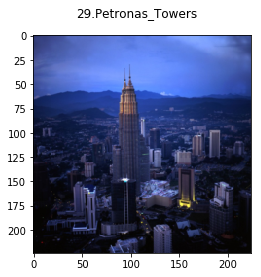

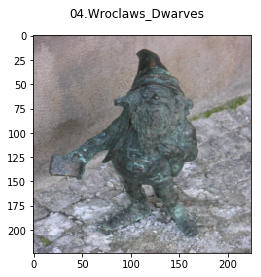

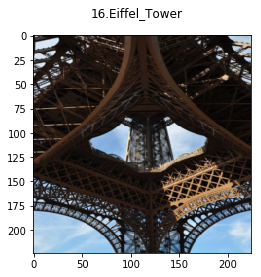

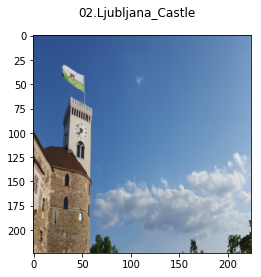

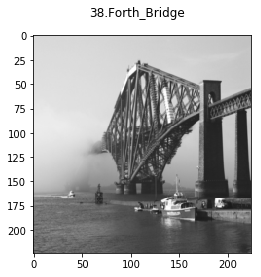

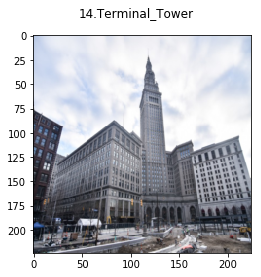

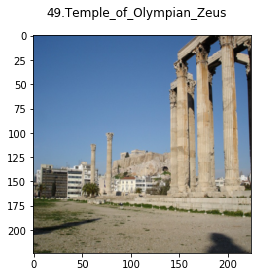

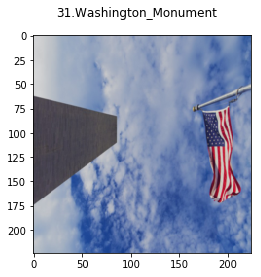

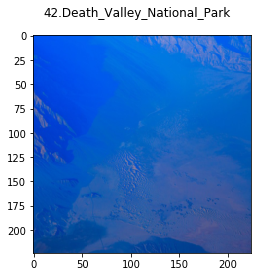

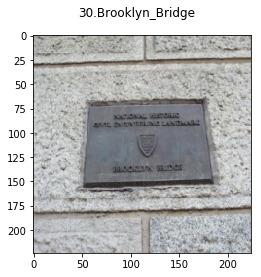

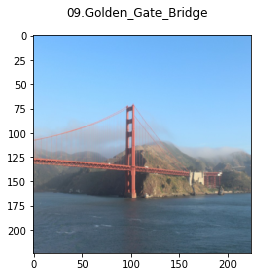

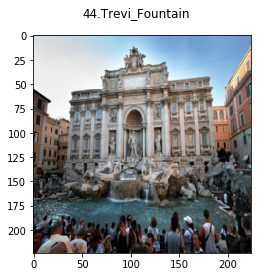

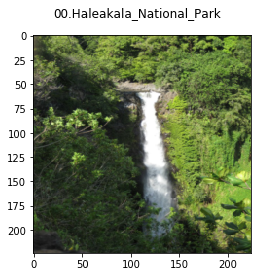

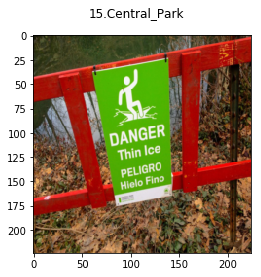

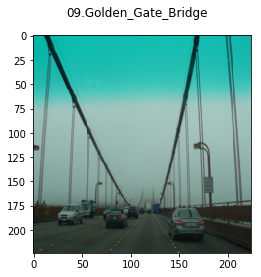

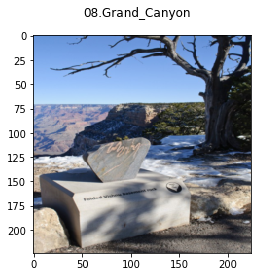

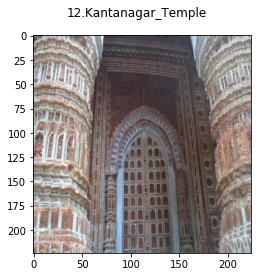

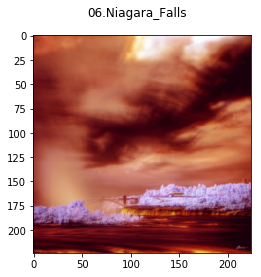

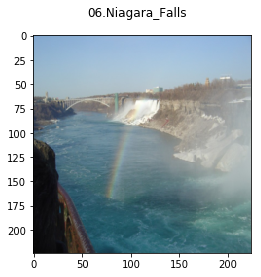

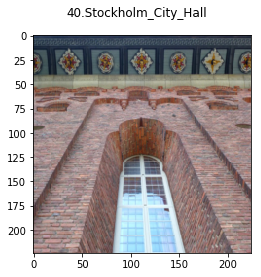

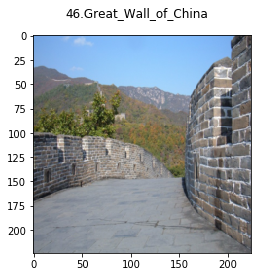

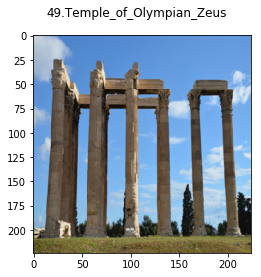

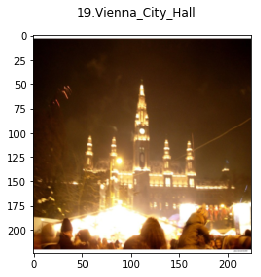

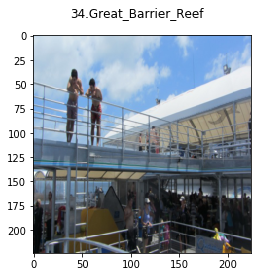

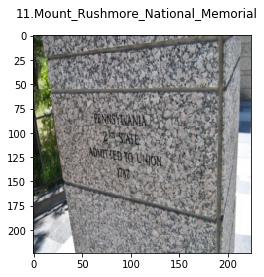

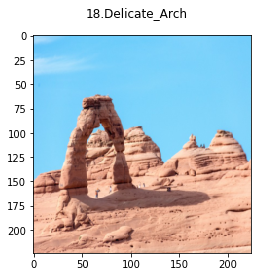

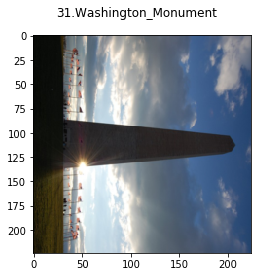

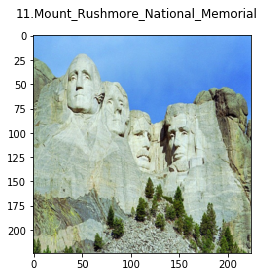

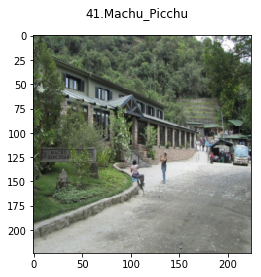

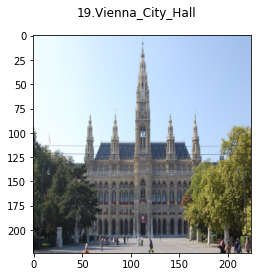

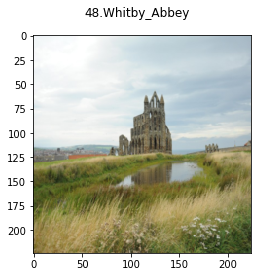

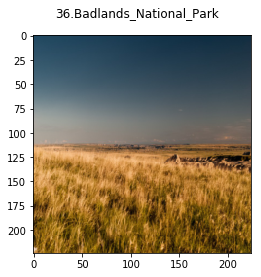

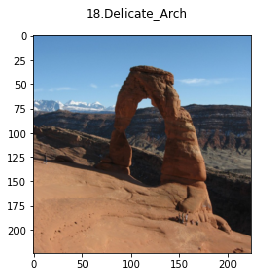

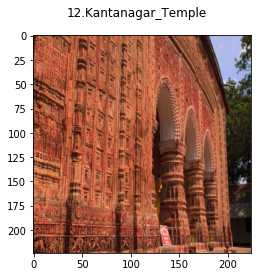

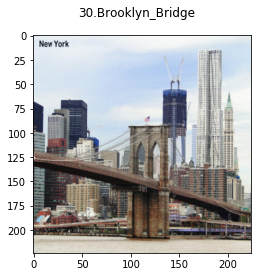

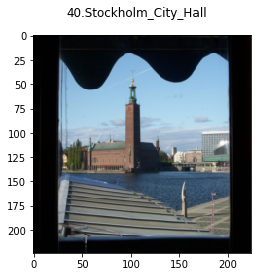

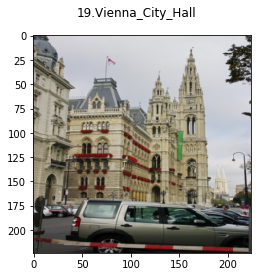

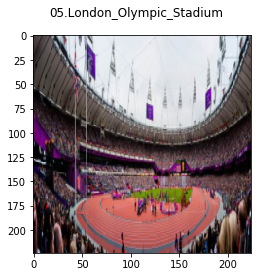

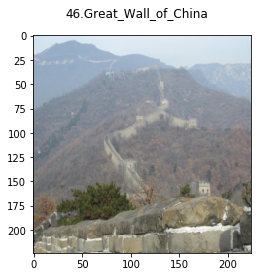

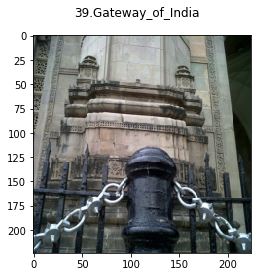

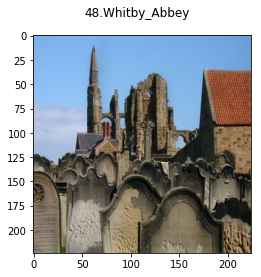

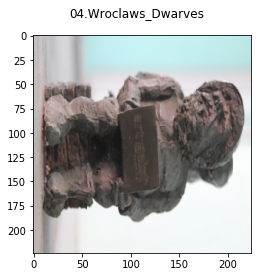

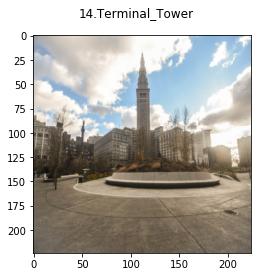

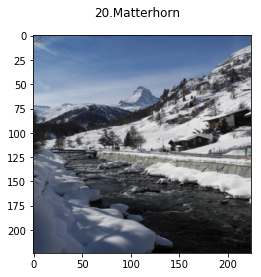

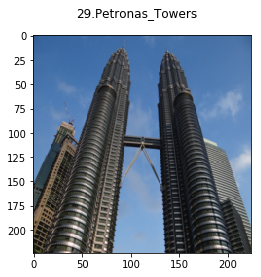

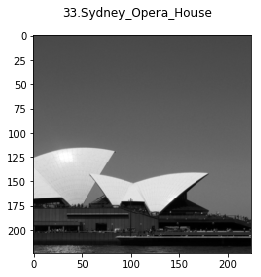

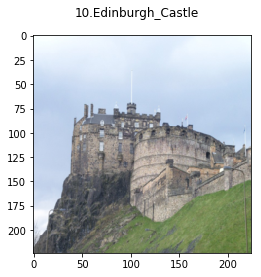

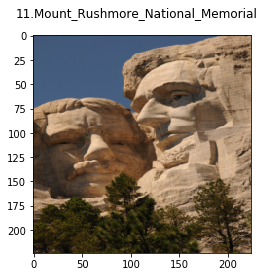

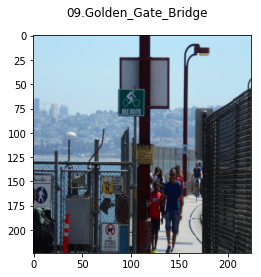

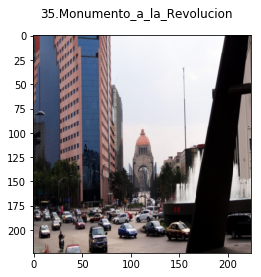

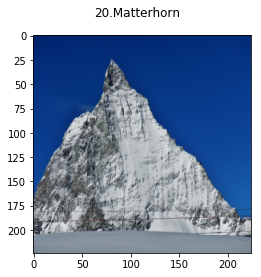

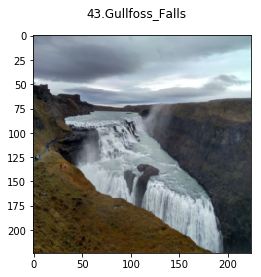

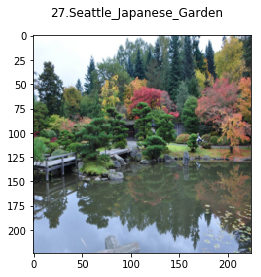

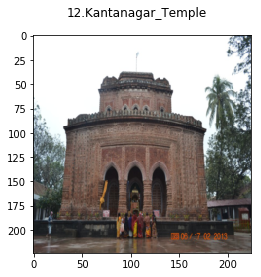

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)



images, labels  = next(iter(loaders_scratch['train']))
for i in range(batch_size):
    img = images[i].numpy().transpose(1, 2, 0)    
    plt.imshow(img)
    plt.suptitle(datasetrain.classes[labels[i]])
    plt.show()

### Initialize use_cuda variable

In [24]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()
use_cuda

True

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [25]:
## TODO: select loss function
import torch.optim as optim

criterion_scratch = torch.nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    return optimizer
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [26]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 64, 7, padding=5)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(4, 4)
        self.fc1 = torch.nn.Linear(512*7*7, 128)
        self.fc2 = torch.nn.Linear(128, 50)
        self.drpt = torch.nn.Dropout(0.35)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool2(F.relu(self.conv4(x)))
        x = x.view(x.size(0), -1)
        x = self.drpt(x)
        x = F.relu(self.fc1(x))
        x = self.drpt(x)
        x = self.fc2(x)

        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [27]:
model_scratch

Net(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(5, 5))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=50, bias=True)
  (drpt): Dropout(p=0.35)
)

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  I played around with the number of convolutional layers, until I got a suitable depth without overdoing the number of layers or increasing the depth too drastically, then I applied 2 fully connected layers as I found the fewer the fully connected layers the better as it overfits less, perhpas it would perform better with only one, maxpools where applied after every conv2d and a high dropout was used

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [28]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = numpy.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda: 
                data, target = data.cuda(), target.cuda()
                
            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            
            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
            
       
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            valid_loss_min = valid_loss
            print(valid_loss_min, 'saving model')
            torch.save(model.state_dict(), save_path)
            
    
    model.load_state_dict(torch.load(save_path))
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [29]:
    ## TODO: implement a weight initialization strategy
def custom_weight_init(m):
        if isinstance(m, (nn.Linear or nn.Conv2d)):
            torch.nn.init.xavier_uniform_(m.weight, gain=1.414)
            m.bias.data.fill_(0)
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)


Net(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(5, 5))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=50, bias=True)
  (drpt): Dropout(p=0.35)
)

In [30]:
model_scratch = train(15, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.927142 	Validation Loss: 3.884807
3.8848070651292796 saving model
Epoch: 2 	Training Loss: 3.868957 	Validation Loss: 3.853373
3.8533725738525395 saving model
Epoch: 3 	Training Loss: 3.819148 	Validation Loss: 3.783025
3.783024683594704 saving model
Epoch: 4 	Training Loss: 3.757200 	Validation Loss: 3.702521
3.7025213539600372 saving model
Epoch: 5 	Training Loss: 3.665075 	Validation Loss: 3.610460
3.6104599982500076 saving model
Epoch: 6 	Training Loss: 3.564384 	Validation Loss: 3.542189
3.5421893298625946 saving model
Epoch: 7 	Training Loss: 3.439726 	Validation Loss: 3.454390
3.4543899297714233 saving model
Epoch: 8 	Training Loss: 3.346422 	Validation Loss: 3.361311
3.3613105565309525 saving model
Epoch: 9 	Training Loss: 3.241260 	Validation Loss: 3.267532
3.267531588673592 saving model
Epoch: 10 	Training Loss: 3.106656 	Validation Loss: 3.209630
3.209630087018013 saving model
Epoch: 11 	Training Loss: 2.991146 	Validation Loss: 3.195396
3.19539551

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [31]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 20

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.917697 	Validation Loss: 3.912162
3.912161901593208 saving model
Epoch: 2 	Training Loss: 3.890140 	Validation Loss: 3.859781
3.859780639410019 saving model
Epoch: 3 	Training Loss: 3.831680 	Validation Loss: 3.808195
3.8081948906183243 saving model
Epoch: 4 	Training Loss: 3.740860 	Validation Loss: 3.702446
3.702445760369301 saving model
Epoch: 5 	Training Loss: 3.654157 	Validation Loss: 3.620053
3.6200530529022217 saving model
Epoch: 6 	Training Loss: 3.551013 	Validation Loss: 3.547420
3.5474197566509242 saving model
Epoch: 7 	Training Loss: 3.460570 	Validation Loss: 3.459261
3.459260955452919 saving model
Epoch: 8 	Training Loss: 3.400405 	Validation Loss: 3.412263
3.41226290166378 saving model
Epoch: 9 	Training Loss: 3.303907 	Validation Loss: 3.309043
3.309043332934379 saving model
Epoch: 10 	Training Loss: 3.196659 	Validation Loss: 3.267741
3.267741098999977 saving model
Epoch: 11 	Training Loss: 3.135253 	Validation Loss: 3.238901
3.2389007955789

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [32]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += numpy.sum(numpy.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.326165


Test Accuracy: 41% (2059/4996)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [33]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transfor|ms, and batch_sizes

loaders_transfer = {'train': trainloader, 'valid': validloader, 'test': testloader}





### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [34]:
## TODO: select loss function
criterion_transfer = torch.nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    params_to_update = []
    for name, param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
    return optim.Adam(params_to_update, lr = 0.001)

    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [35]:
## TODO: Specify model architecture

model_transfer = torchvision.models.resnet34(pretrained=True)

count = 0 


for name,child in model_transfer.named_children():
    if name not in ['fc']:   #, 'layer4'
        for param in child.parameters(): param.requires_grad = False
        
    
    


numf = model_transfer.fc.in_features
model_transfer.fc = torch.nn.Sequential(nn.Dropout(0.4),
                                        nn.Linear(numf, 50))

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

In [36]:
print(model_transfer)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I found one of the best pretrained networks for image classification, (according to a couple searches I did), I did this at first with a smaller version of resnet but it works better with this one, then I removed the last layer and changed it for a fc with the number of desired outputs and added a high dropout to prevent overfitting

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [37]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

model_transfer = train(32, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
                      criterion_transfer, use_cuda, 'model_transfer.pt')


#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.440391 	Validation Loss: 2.513955
2.5139553546905513 saving model
Epoch: 2 	Training Loss: 2.270382 	Validation Loss: 1.888926
1.888926386833191 saving model
Epoch: 3 	Training Loss: 1.801359 	Validation Loss: 1.599132
1.5991316214203837 saving model
Epoch: 4 	Training Loss: 1.555730 	Validation Loss: 1.447155
1.447154775261879 saving model
Epoch: 5 	Training Loss: 1.402059 	Validation Loss: 1.358428
1.3584282249212265 saving model
Epoch: 6 	Training Loss: 1.285397 	Validation Loss: 1.270354
1.2703542485833168 saving model
Epoch: 7 	Training Loss: 1.239456 	Validation Loss: 1.235342
1.235341526567936 saving model
Epoch: 8 	Training Loss: 1.147441 	Validation Loss: 1.220825
1.2208249904215334 saving model
Epoch: 9 	Training Loss: 1.125071 	Validation Loss: 1.173228
1.173227809369564 saving model
Epoch: 10 	Training Loss: 1.076825 	Validation Loss: 1.159441
1.1594407558441162 saving model
Epoch: 11 	Training Loss: 1.039080 	Validation Loss: 1.144011
1.144010853

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [38]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.533763


Test Accuracy: 87% (4383/4996)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [39]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [40]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    model_transfer.eval()
    img = Image.open(img_path)
    img = datatransform(img).unsqueeze(0)
    output = model_transfer(img.cuda()).squeeze(0)
    
    outputnp = output.cpu().detach().numpy()
    
    classindices = numpy.argsort(-1*outputnp)[:k]
    #classindices = output.argsort(descending=True)[:k]  This torch version is trash and doesnt support argsort :(
    
    return [datasetrain.classes[i] for i in classindices]


# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['09.Golden_Gate_Bridge',
 '38.Forth_Bridge',
 '30.Brooklyn_Bridge',
 '03.Dead_Sea',
 '28.Sydney_Harbour_Bridge']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

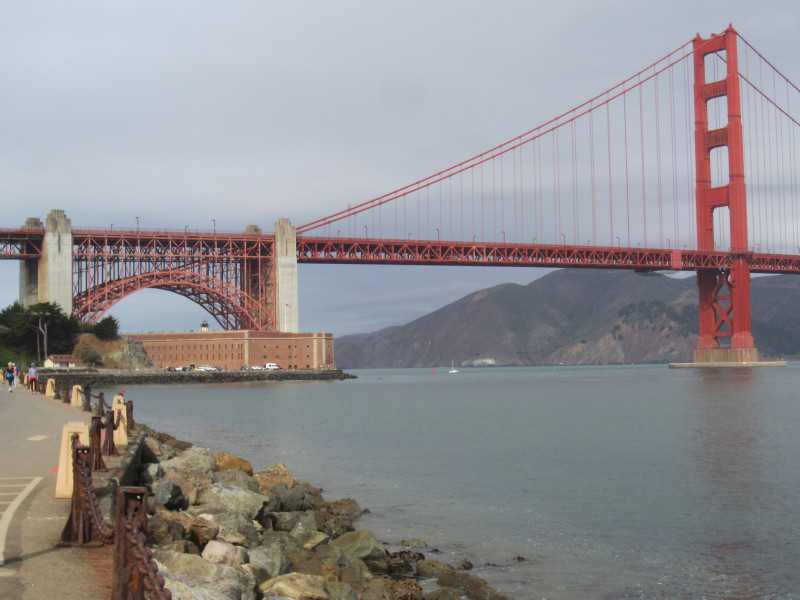

Top 3 most likely places for these image are:
09.Golden_Gate_Bridge
38.Forth_Bridge
30.Brooklyn_Bridge


In [41]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    imag = Image.open(img_path)
    display(imag)
    print("Top 3 most likely places for these image are:")
    for x in range(len(predicted_landmarks)):
        print(predicted_landmarks[x])
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

my network got an accuracy much higher than I anticipated:))

1. a bigger network could be used such as resnet 50 or even bigger 
2. other layers in the network could be trained such as the last 2 (this would be even better if a bigger net is used )
3. data could be augmented a lot more so that the network generalises better as images are harder to classify or more training data could be found  

In [42]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.



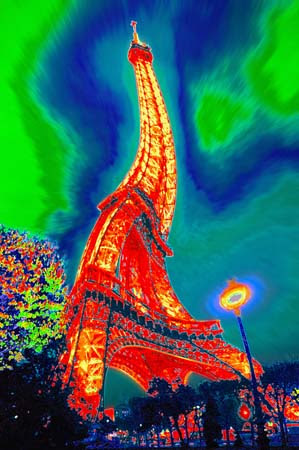

Top 3 most likely places for these image are:
34.Great_Barrier_Reef
27.Seattle_Japanese_Garden
24.Soreq_Cave


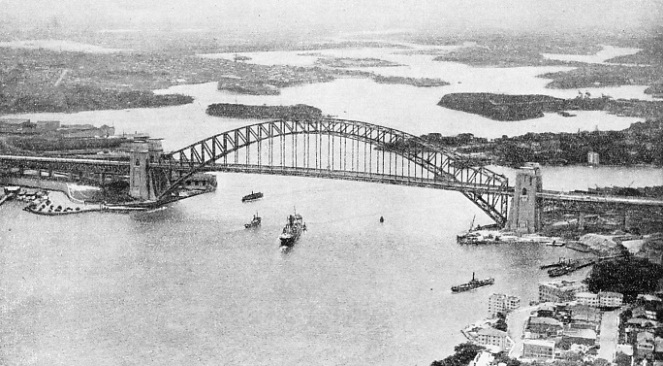

Top 3 most likely places for these image are:
28.Sydney_Harbour_Bridge
16.Eiffel_Tower
35.Monumento_a_la_Revolucion


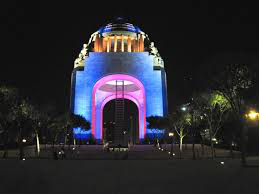

Top 3 most likely places for these image are:
35.Monumento_a_la_Revolucion
28.Sydney_Harbour_Bridge
33.Sydney_Opera_House


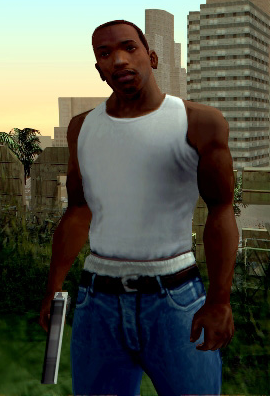

Top 3 most likely places for these image are:
01.Mount_Rainier_National_Park
45.Temple_of_Heaven
29.Petronas_Towers


In [43]:
suggest_locations("ieffel.jpg")
suggest_locations("sydneybridge.jpg")
suggest_locations("monumento.jpg")
suggest_locations("cj.jpg")